<a href="https://colab.research.google.com/github/RitikaVinayakamurthy/CE888/blob/main/CE888Assignmet1/Assignment1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#The Libraries are imported
import glob
import cv2
import matplotlib.pyplot as plt
import random
import pandas as pd
import numpy as np
import seaborn as sns
import tensorflow as tf
from sklearn.model_selection import train_test_split
from keras.preprocessing.image import ImageDataGenerator


In [ ]:
#Mounting to the google drive where the data is uploaded
from google.colab import drive
drive.mount('/content/drive/')
import os
os.chdir("drive/My Drive")


Mounted at /content/drive/


In [ ]:
#Loading the Training Fire and No Fire dataset
lst_fire_img = glob.glob('/content/drive/MyDrive/fire_dataset/data/Training/Fire/*.jpg')
lst_non_fire_img = glob.glob('/content/drive/MyDrive/fire_dataset/data/Training/No_Fire/*.jpg')

In [ ]:
#Number of Images in Fire and No Fire
print('Number of images with fire : {}'.format(len(lst_fire_img)))
print('Number of images with No fire : {}'.format(len(lst_non_fire_img)))

Number of images with fire : 25018
Number of images with No fire : 14357


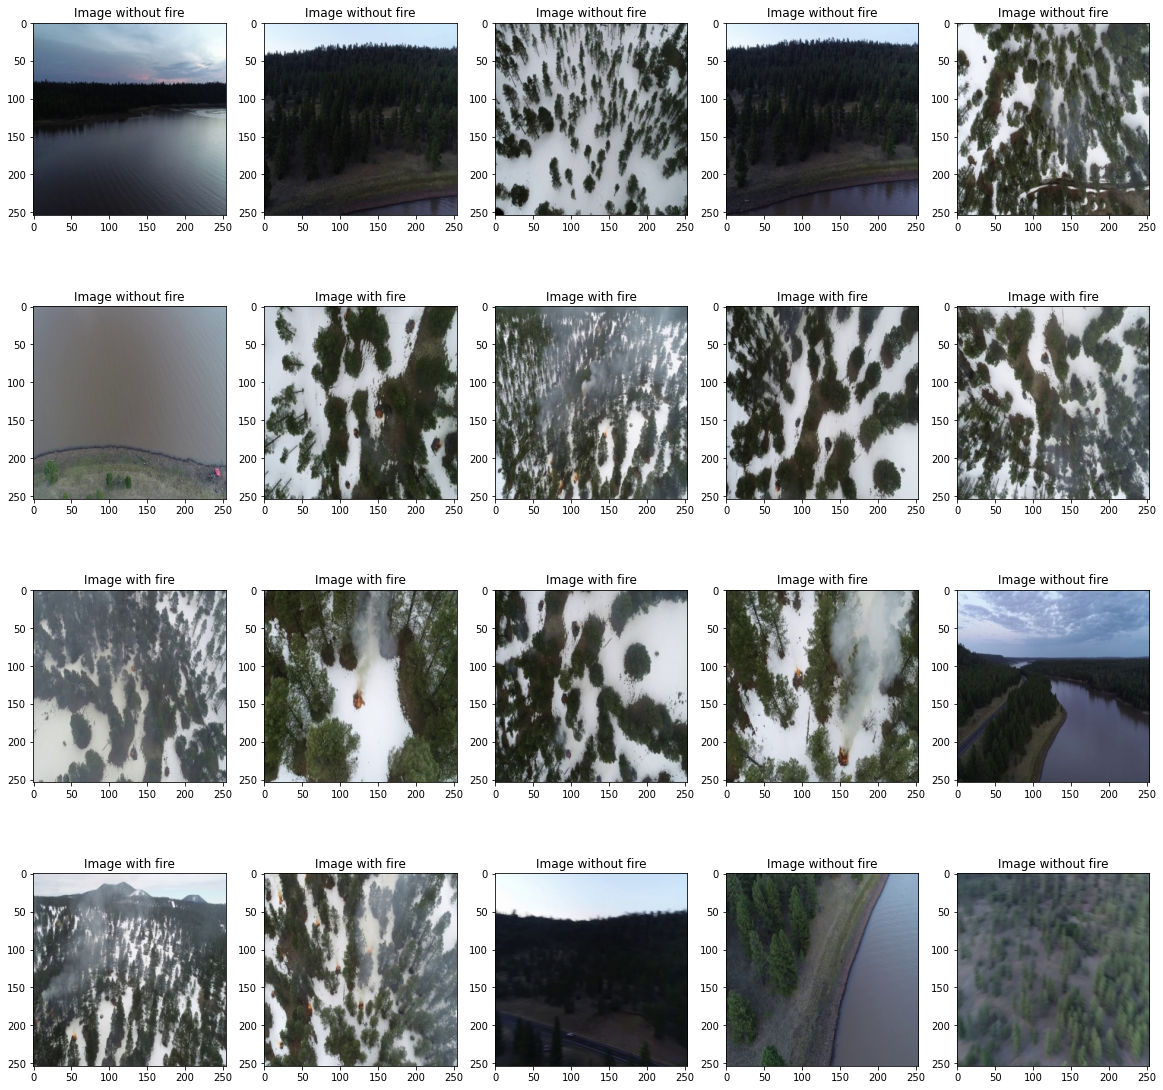

In [ ]:
 #merging and shuffeling of the datasets
 lst_images_random = random.sample(lst_fire_img,10) + random.sample(lst_non_fire_img,10)
random.shuffle(lst_images_random)

#Ploting the first 20 images
plt.figure(figsize = (20,20))

for i in range(len(lst_images_random)):
    
    plt.subplot(4,5,i+1)

    if "No_Fire" in lst_images_random[i]:
        img = cv2.imread(lst_images_random[i])
        img = cv2.cvtColor(img,cv2.COLOR_RGB2BGR)
        plt.imshow(img,cmap = 'gray')
        plt.title('Image without fire')

    else:
        img = cv2.imread(lst_images_random[i])
        img = cv2.cvtColor(img,cv2.COLOR_RGB2BGR)
        plt.imshow(img,cmap = 'gray')
        plt.title("Image with fire")



plt.show()

In [ ]:
#Loading an image to check the dimensions
import PIL
image_dim = PIL.Image.open(str(lst_fire_img[1]))

In [ ]:
#Width and height of the image
width, height = image_dim.size
print(width,height)

254 254


In [ ]:
#checking the mode of the image
image_dim.mode

'RGB'

In [ ]:
#storing the dataset path
trainingpath = "/content/drive/MyDrive/fire_dataset/data/Training"

In [ ]:
#Augmenting the data using Image data generator and also spliting the data into train and validation (with 70%-30% split)
datagen = ImageDataGenerator(
        rescale=1.0 / 255, #scaling
        rotation_range=10, # rotation
        width_shift_range=0.2, # horizontal shift
        height_shift_range=0.2, # vertical shift
          =0.2, # zoom
        horizontal_flip=True, # horizontal flip
        brightness_range=[0.2,1.2],validation_split=0.3) # brightness

In [ ]:
#training data
train_generator = datagen.flow_from_directory(
                  directory=trainingpath,
                  target_size=(254, 254), # resize to this size
                  color_mode="rgb", # for coloured images  rgb,   grayscale
                  batch_size=10, # number of images to extract from folder for every batch
                  class_mode="binary", # classes to predict
                  classes=['No_Fire','Fire'],
                  subset="training",
                  seed=2020 # to make the result reproducible
                  )

Found 27563 images belonging to 2 classes.


In [ ]:
len(train_generator)

2757

In [ ]:
#Validation data
val_generator = datagen.flow_from_directory(
                  directory=trainingpath,
                  target_size=(254, 254), # resize to this size
                  color_mode="rgb", # for coloured images
                  batch_size=10, # number of images to extract from folder for every batch
                  class_mode="binary", # classes to predict
                  classes=['No_Fire','Fire'],
                  subset="validation",
                  seed=2020 # to make the result reproducible
                  )

Found 11812 images belonging to 2 classes.


In [ ]:
len(val_generator)

1182

In [ ]:
#Using the CNN model
